# Python Session #3: Data Summary / Satistics -


## Lecture Structure:

1. Measure of central tendency

- Mean
- Median
- Mode

2. Measure of spread

- Range
- Standard Deviation
- Variance

3. Correlation coeffcient

## We will use:
- `statistics.mean()`,
`statistics.median()`,
`statistics.mean()`,
`groupby.mean()`,
`groupby.median()`,
`gmean()`,
`statistics.stdev()`,
`statistics.variance()`,
`corr()`,
`numpy.corrcoef()`

In [8]:
### Importing libraries and packages
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
### Reading data

cars = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")  # cars dataset
olist = pd.read_csv("https://raw.githubusercontent.com/Kartthik-Rathinakumar/ReDI/main/Olist.csv")  # Olist - new dataset
rentals = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv")


## **Question #1 : Rentals dataset**

For the rentals dataset, identify:

1. Dependent variable

2. Indpendent variable(s)

3. Statistically prove their relation, use the help of visual diagram whenever necessary.

In [10]:
### Answer #1.1
rentals.head(6)


,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27
5,Köpenick,well_kept,2.0,840.00,1997,73.51


there are .head(6) is to check the 1-6 rows and columns of the dataFrame.


In [11]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


.info() provide information on the number of entries like total number of rows and columns,datatype and also it gives information if there are missing values in the dataFrame.

In [12]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


.describe() tells us the statistical status of the dataFrame.like inter quartile range,min and max values mean,standard deviation and count.

In [13]:
rentals.Rooms.value_counts()

,count
Rooms,
2.0,262
3.0,240
1.0,107
4.0,99
5.0,19
2.5,16
1.5,9
3.5,8
7.0,2


This code provides count on the number of different rooms  available.Rooms 2.0 has the highest count meaning that this rooms type is in high demand,followed by rooms 3.0 and 1.0.

In [14]:
dependent_variable = rentals.loc[:,'Rent']
print(dependent_variable)

0      2659.00
1      1200.00
2       979.00
3      1830.22
4      2272.00
        ...   
759     959.00
760     649.00
761    2750.00
762    1259.00
763     888.00
Name: Rent, Length: 764, dtype: float64


Rent is the dependable variable because the space of the and rooms determines the rent.

In [15]:
### Answer #1.2

In [16]:
independent_variables = rentals.loc[:,['Region','Condition','Rooms','Year_Construction','Space']]
print(independent_variables)

          Region        Condition  Rooms  Year_Construction   Space
0          Mitte   first_time_use    4.0               2019  117.20
1      Kreuzberg   first_time_use    1.0               2020   29.33
2       Köpenick        well_kept    2.0               1997   83.61
3    Wilmersdorf        well_kept    4.0               1900  171.18
4      Kreuzberg   first_time_use    2.0               2020   88.27
..           ...              ...    ...                ...     ...
759      Wedding   mint_condition    1.0               2017   27.80
760      Wedding   mint_condition    1.0               2017   20.50
761  Wilmersdorf   mint_condition    4.0               2017  110.00
762     Köpenick        well_kept    2.0               2017   91.20
763     Neukölln  fully_renovated    2.0               1990   68.48

[764 rows x 5 columns]


The independent varables are region,condition,year of construction and space.All these variables could have positive or negative influence on the dependent variable (rent).

In [17]:
### Answer #1.3

                                                 Rooms      Rent  \
Rooms                                         1.000000  0.628816   
Rent                                          0.628816  1.000000   
Year_Construction                            -0.009086  0.078858   
Space                                         0.793338  0.855683   
Region_Charlottenburg                        -0.008210 -0.004591   
Region_Friedrichsfelde                       -0.013306 -0.175248   
Region_Kreuzberg                             -0.015303  0.064281   
Region_Köpenick                              -0.073871 -0.160275   
Region_Mitte                                  0.101633  0.286653   
Region_Neukölln                              -0.077344 -0.150257   
Region_Prenzlauer                             0.029903  0.055801   
Region_Tiergarten                             0.099463  0.070283   
Region_Wedding                               -0.196631 -0.198863   
Region_Wilmersdorf                            0.

<Axes: >

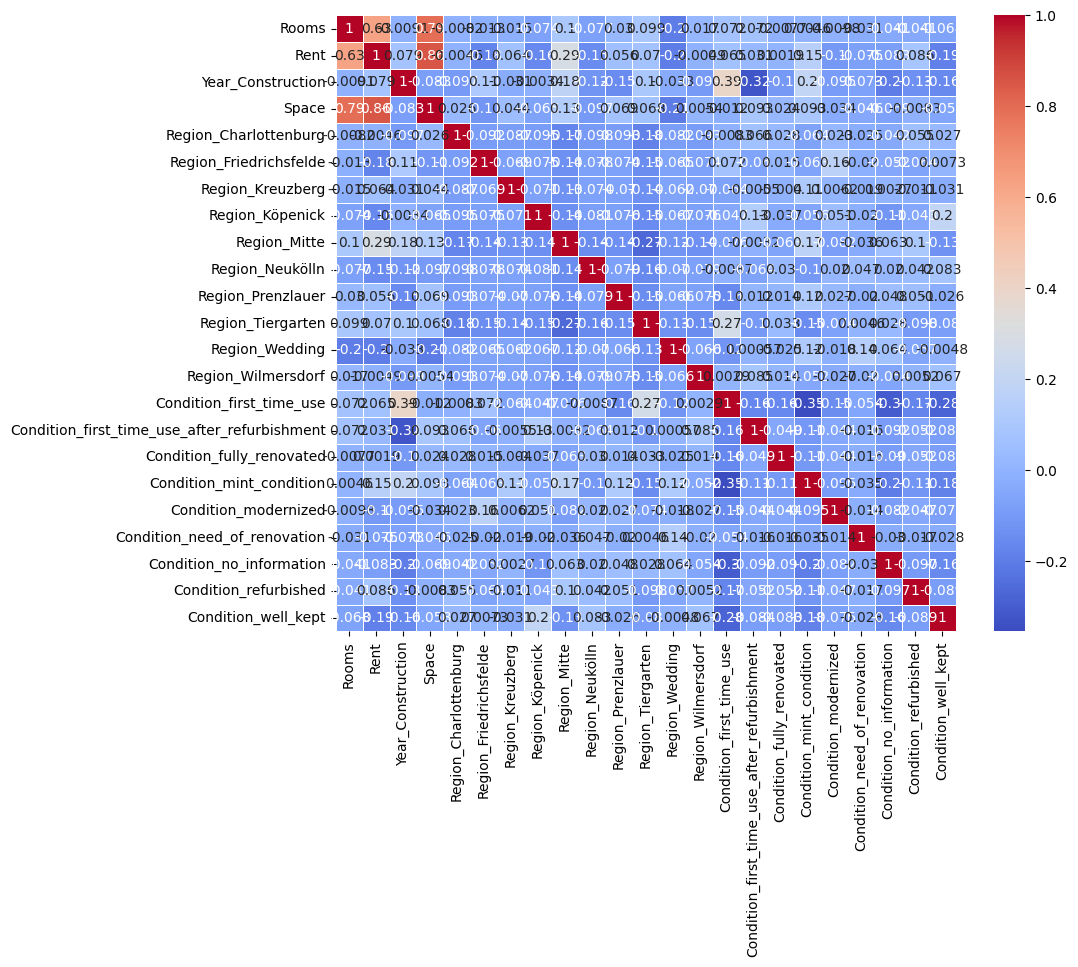

In [18]:
rentals_encoded = pd.get_dummies(rentals)
correlation_matrix = rentals_encoded.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


The heatmap shows correlation between variables.rooms,space and rent have positive correlation.And correlation between other variables is weak or negative for example year of construction and rooms negative correlation.

## **Question #2 : rentals dataset**

Identify the best region to live, based on:

1. Average Price

2. Average Rooms Available

3. Average Space

4. What type of apartment condition is mostly available in Mitte, Kruezberg and Wilmersforf respectively?

In [19]:
### Identify the best region to live, based on: Average Price
average_price_per_region = rentals.groupby('Region')['Rent'].mean().reset_index()
sorted_region = average_price_per_region.sort_values(by='Rent', ascending=True)
print(sorted_region)



            Region         Rent
8          Wedding   847.138571
1  Friedrichsfelde  1043.871731
3         Köpenick  1125.475818
5         Neukölln  1188.114915
9      Wilmersdorf  1748.646226
0   Charlottenburg  1753.452532
7       Tiergarten  1914.824795
6       Prenzlauer  1996.962264
2        Kreuzberg  2049.138085
4            Mitte  2408.725033


<Axes: xlabel='Region', ylabel='Rent'>

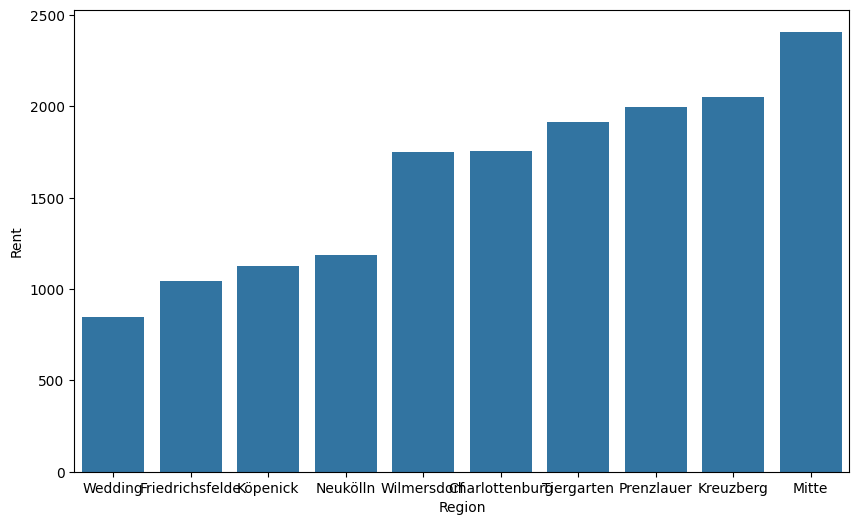

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Rent', data=sorted_region)

Based on the average price from the chart above Wedding is the best region to live because it has the lowest rent.

In [21]:
### Identify the best region to live, based on: Average Rooms Available
#Best region to live based on average Rooms is Mitte.


            Region     Rooms
8          Wedding  1.726190
5         Neukölln  2.279661
3         Köpenick  2.281818
2        Kreuzberg  2.489362
1  Friedrichsfelde  2.500000
0   Charlottenburg  2.525316
9      Wilmersdorf  2.613208
6       Prenzlauer  2.660377
7       Tiergarten  2.736842
4            Mitte  2.754902


<Axes: xlabel='Region', ylabel='Rooms'>

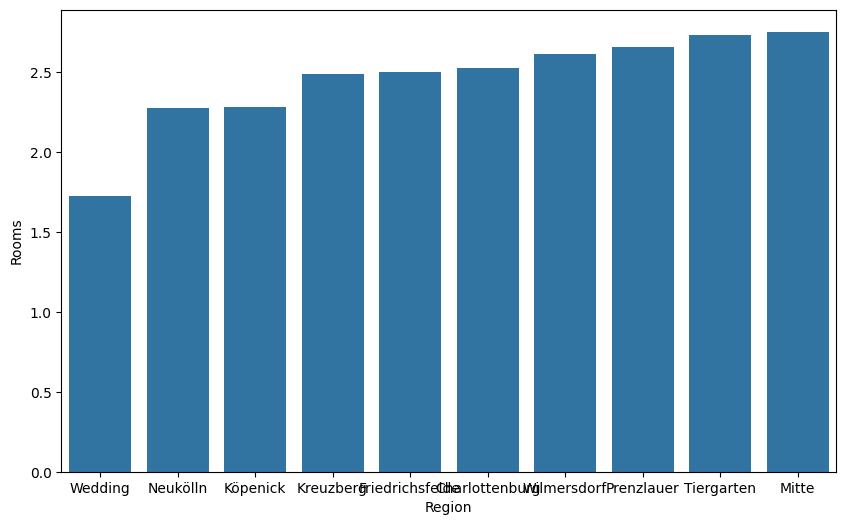

In [22]:
average_rooms_per_region = rentals.groupby('Region')['Rooms'].mean().reset_index()
sorted_rooms = average_rooms_per_region.sort_values(by='Rooms', ascending=True)
print(sorted_rooms)
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Rooms', data=sorted_rooms)


Mitte and Tiergarten are best regions to live based on average rooms is closer to 3.They have more rooms available for rent.

            Region      Space
8          Wedding  46.928571
1  Friedrichsfelde  66.145000
5         Neukölln  69.849831
3         Köpenick  74.279273
9      Wilmersdorf  85.536604
0   Charlottenburg  88.083038
7       Tiergarten  90.228304
2        Kreuzberg  92.258723
6       Prenzlauer  95.832264
4            Mitte  96.235556


<Axes: xlabel='Region', ylabel='Space'>

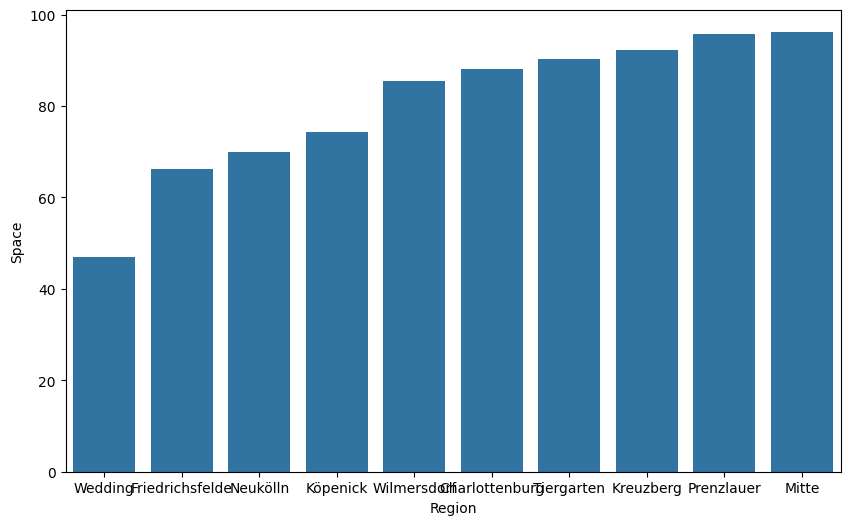

In [23]:
### Identify the best region to live, based on: Average Space
average_space_per_region = rentals.groupby('Region')['Space'].mean().reset_index()
sorted_space = average_space_per_region.sort_values(by='Space', ascending=True)
print(sorted_space)
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Space', data=sorted_space)

From the barplot the best area to live is Mitte because the average space is larger than the other regions.Second option would be Prenzlauer and third option is Kreuzberg.

In [24]:
### What type of apartment condition is mostly available in Mitte, Kruezberg and Wedding respectively.

#rentals.loc[:,['Region','Condition']][rentals.Region.isin(['Mitte','Kreuzberg','Wedding'])].value_counts()
#rentals.groupby('Region')['Condition'].value_counts().to_frame()

filtered_df = rentals.query('Region == ["Mitte", "Kreuzberg", "Wedding"]')
filtered_df.groupby(['Region', 'Condition'])['Condition'].count()


Region     Condition                         
Kreuzberg  first_time_use                        11
           first_time_use_after_refurbishment     2
           fully_renovated                        2
           mint_condition                        17
           modernized                             2
           no_information                         7
           refurbished                            2
           well_kept                              4
Mitte      first_time_use                        43
           first_time_use_after_refurbishment     7
           fully_renovated                        3
           mint_condition                        49
           modernized                             1
           no_information                        29
           refurbished                           15
           well_kept                              6
Wedding    first_time_use                         5
           first_time_use_after_refurbishment     2
           fully_renovated                        1
           mint_condition                        16
           modernized                             1
           need_of_renovation                     2
           no_information                        10
           well_kept                              5
Name: Condition, dtype: int64

The most common apartment condition Mitte, Wedding and Kreuzberg is mint condition.

## **Question #3 : rentals dataset**

1. In what location are both the mean and median are same in terms of apartment Space?
2. Identify the location where the apartment rent variation is the highest
3. What is the average price of 2 room apartment in Mitte?

In [44]:
### In what location are both the mean and median are same in terms of apartment Space?
rentals.groupby('Region')['Space'].agg(['mean', 'median']).round(0)


,mean,median
Region,,
Charlottenburg,88.0,81.0
Friedrichsfelde,66.0,62.0
Kreuzberg,92.0,86.0
Köpenick,74.0,74.0
Mitte,96.0,85.0
Neukölln,70.0,66.0
Prenzlauer,96.0,80.0
Tiergarten,90.0,89.0
Wedding,47.0,38.0


Kopenick has the same mean and median in terms of apartment space.

In [26]:
### Identify the location where the apartment rent variation is very the highest
rentals.groupby('Region')['Rent'].var().sort_values(ascending=False)


,Rent
Region,
Mitte,2.381032e+06
Kreuzberg,1.375465e+06
Charlottenburg,1.267395e+06
Prenzlauer,1.184929e+06
Wilmersdorf,8.863154e+05
Tiergarten,6.185267e+05
Neukölln,3.048646e+05
Friedrichsfelde,1.627336e+05
Köpenick,1.527423e+05


Mitte has the highest variation in apartment rent.

In [27]:
### What is the average price of 2 room apartment in Mitte?
rentals.loc[(rentals.Region == 'Mitte') & (rentals.Rooms == 2), 'Rent'].mean()


1805.7333333333336

The average price of 2 rooms apartment in Mitte is 1,806 Euro.

## **Question #4 : Apartments dataset**

Identify an outlier from the Apartments dataset. Statistically show the difference in central tendency with and without those outliers.



In [28]:
rentals.groupby('Region')['Rent'].mean().reset_index()
rentals.groupby('Region')['Rent'].median().reset_index()



,Region,Rent
0,Charlottenburg,1498.00
1,Friedrichsfelde,971.00
2,Kreuzberg,1817.00
3,Köpenick,969.00
4,Mitte,1959.00
5,Neukölln,1055.43
6,Prenzlauer,1639.52
7,Tiergarten,1869.56
8,Wedding,771.50
9,Wilmersdorf,1557.28


In [29]:
mean_with_outliers = rentals['Rent'].mean()
median_with_outliers = rentals['Rent'].median()
print("Mean with outliers:", mean_with_outliers)
print("Median with outliers:", median_with_outliers)

Mean with outliers: 1768.560942408377
Median with outliers: 1565.48


In [30]:
mean_without_outliers = rentals['Rent'].mean()
median_without_outliers = rentals['Rent'].median()
print("Mean without outliers:", mean_without_outliers)
print("Median without outliers:", median_without_outliers)

Mean without outliers: 1768.560942408377
Median without outliers: 1565.48


<Axes: ylabel='Rent'>

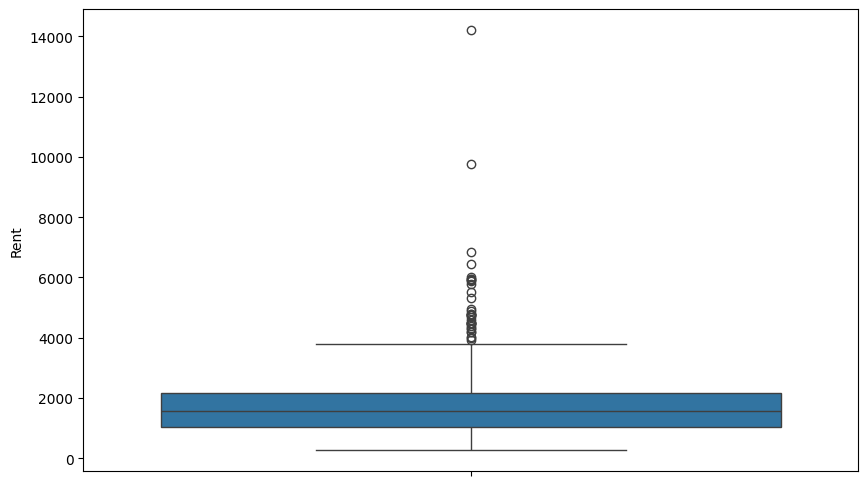

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(rentals['Rent'])

Rents above 4000 is outlier.

<Axes: ylabel='Frequency'>

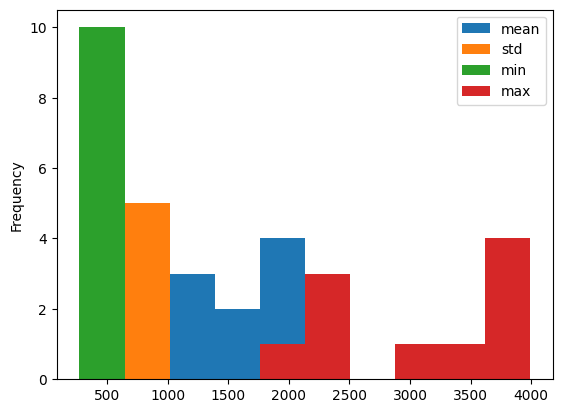

In [49]:
rentals_new=rentals.query('Rent <4000').groupby(['Region']).agg({'Rent' :['mean','std','min','max']})
rentals_new['Rent'].plot(kind= 'hist')

In [32]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


<Axes: ylabel='Frequency'>

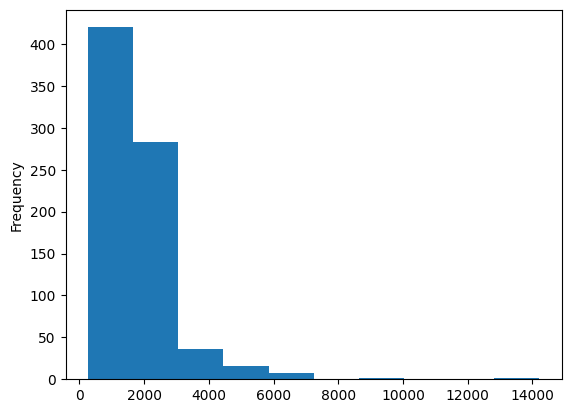

In [45]:
rentals.groupby(['Region']).agg({'Rent' :['mean','std','min','max']})
rentals['Rent'].plot(kind= 'hist')

<Axes: ylabel='Frequency'>

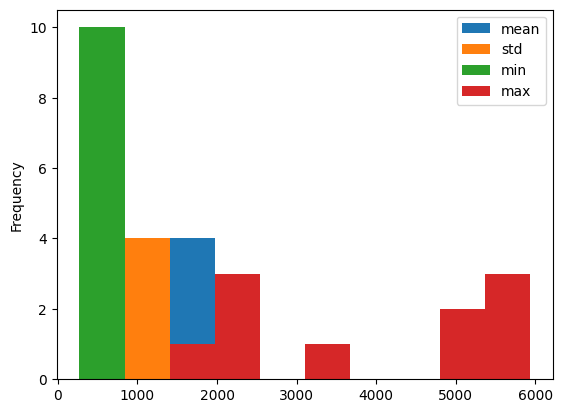

In [46]:
rentals_new = rentals.query('Rent <6000').groupby(['Region']).agg({'Rent' :['mean','std','min','max']})
rentals_new['Rent'].plot(kind= 'hist')
#

<Axes: >

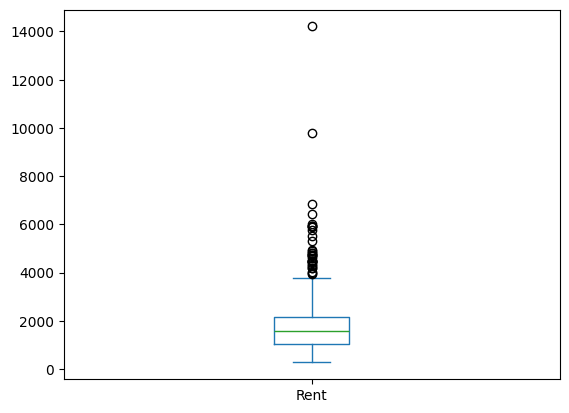

In [47]:
rentals['Rent'].plot(kind= 'box')

In [33]:
numeric_rentals = rentals.select_dtypes(include=[np.number])
numeric_rentals.head()

,Rooms,Rent,Year_Construction,Space
0,4.0,2659.00,2019,117.20
1,1.0,1200.00,2020,29.33
2,2.0,979.00,1997,83.61
3,4.0,1830.22,1900,171.18
4,2.0,2272.00,2020,88.27


<Axes: >

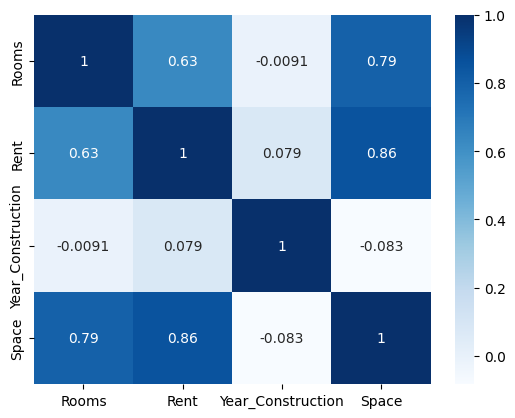

In [34]:
sns.heatmap(numeric_rentals.corr(), annot= True, cmap= 'Blues')

<Axes: xlabel='Rooms', ylabel='Count'>

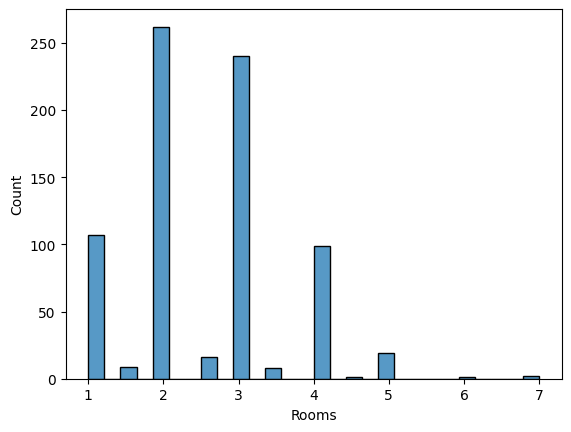

In [35]:
sns.histplot(rentals['Rooms'])

<Axes: ylabel='Rooms'>

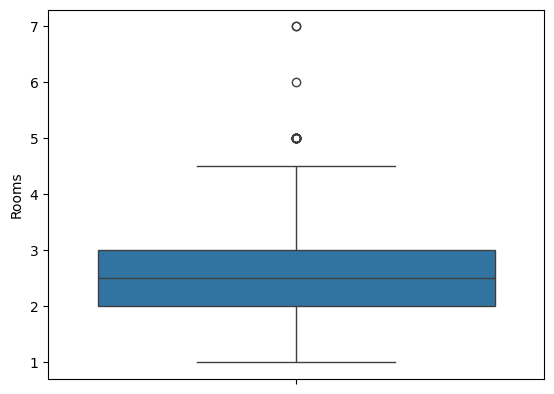

In [36]:
sns.boxplot(rentals['Rooms'])

**Hint**

Identify the outliers visually with a plot.

In [37]:
#Answer


## **EXTRA MATERIAL**

**Using groupby with different functions for different columns**

The `.agg()` method also allows you to apply different functions to different columns. It's done by using a dictionary where the columns selected are the keys, and the functions you want to apply to each columns are the values. There is no need to select the columns before applying `.agg()` in this case, as the columns are selected inside the dictionary.

**Useful aggregation functions:**
- `mean()`
- `median()`
- `var()`
- `std()`
- `min()`
- `max()`
- `count()`
- `sum()`
- `nunique()`

**Bonus question #1:**

Revisit the `describe()` method from session #1. Study the output of the describe method, draw a simple barplot or any visual diagram for the dataset and check your understanding about the dataset.

In [38]:
### Bonus question #1:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


<Axes: xlabel='Rooms', ylabel='Rent'>

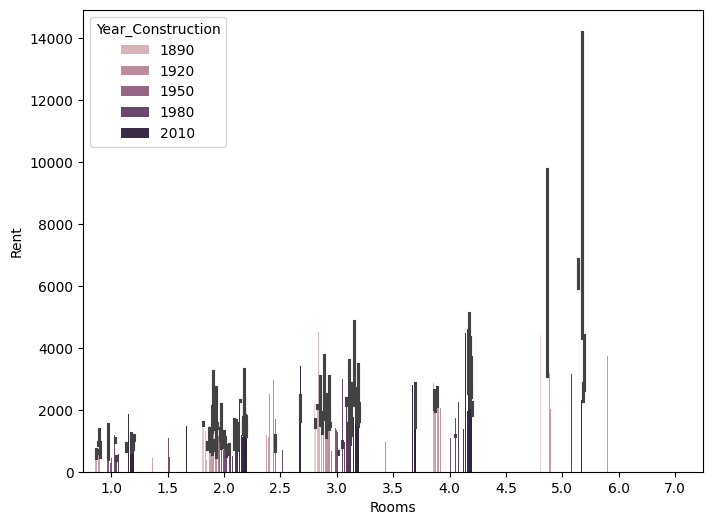

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x='Rooms', y='Rent', hue='Year_Construction', data=rentals)

There are alot of new apartments.some new apartments having 1 room is more expensive compared to others meaning there are some luxurious apartments,however old apartments of 1.5 rooms have less expensive rents.In addition apartments with more rooms have more rents or very expensive especially new construction.Whereas some old apartments with almost 6 rooms have cheaper rents .

**Bonus question #2:**

Below mentioned are the points for 2 teams who participated in a Premiere league football batch. When a team wins a match, they get **3** points, if they lose the match then they get **0** points and if the match is draw then they get **1** point.

Study the data and share your understanding, mainly

According to you, Which team has performed better, why?

Team A : { 3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0 }

Team B : { 3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3 }

In [40]:
### Bonus question #2: # Team B  performed better because they had won many matches,their
  # frequency of matches won is more than team A.
teamA = [3,1,3,1,3,1,0,1,0,1,0,0,1,3,3,1,1,3,1,0]
teamB =[3,1,3,1,3,0,0,0,0,0,0,0,1,3,3,1,1,3,1,3]
import numpy as np
mode_value=st.mode(teamA)
print(mode_value)
mode_value=st.mode(teamB)
print(mode_value)


1
3


**Bonus question #3:**

Based on the available cars data, Check whether the below hypothesis are valid.


1) If the doors are more, then the price of the car is high

2) If the price of the car is high, then the usage of the car is high ( Kms)


In [41]:
### Bonus question #3:
cars.head(6)

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba
5,Volkswagen,Amarok,2014,2.0 Cd Tdi 180cv 4x4 Highline C34,115000,790000,4.0,Pick-Up,Buenos Aires Interior


In [54]:
np.corrcoef(cars['Doors'],cars['Price'])
np.corrcoef(cars['Price'],cars['Kms'])

array([[ 1.       , -0.1590182],
       [-0.1590182,  1.       ]])

Both hypothesis are wrong because correlation between those variables is negative and very weak.